mesh20x20 FiPy example implemented as an IPython notebook
=========================================================

This examples solves a two-dimensional diffusion problem in a square domain and demonstrates the use of applying boundary condition patches.

(Taken from http://www.ctcms.nist.gov/fipy/examples/diffusion/generated/examples.diffusion.mesh20x20.html)

In [1]:
%matplotlib notebook
import matplotlib
from IPython.display import clear_output, display
import time
import matplotlib.pyplot as plt

In [2]:
from fipy import *

In [3]:
nx = 20
ny = nx
dx = 1.
dy = dx
L = dx * nx
mesh = Grid2D(dx=dx, dy=dy, nx=nx, ny=ny)

We create a [CellVariable](http://www.ctcms.nist.gov/fipy/fipy/generated/fipy.variables.html#fipy.variables.cellVariable.CellVariable) and initialize it to zero:

In [4]:
phi = CellVariable(name = "solution variable",
                   mesh = mesh,
                   value = 0.)

and then create a diffusion equation. This is solved by default with an iterative conjugate gradient solver.

In [5]:
D = 1.
eq = TransientTerm() == DiffusionTerm(coeff=D)

We apply Dirichlet boundary conditions

In [6]:
valueTopLeft = 0
valueBottomRight = 1

to the top-left and bottom-right corners. Neumann boundary conditions are automatically applied to the top-right and bottom-left corners.

In [7]:
X, Y = mesh.faceCenters
facesTopLeft = ((mesh.facesLeft & (Y > L / 2))
                | (mesh.facesTop & (X < L / 2)))
facesBottomRight = ((mesh.facesRight & (Y < L / 2))
                    | (mesh.facesBottom & (X > L / 2)))

In [8]:
phi.constrain(valueTopLeft, facesTopLeft)
phi.constrain(valueBottomRight, facesBottomRight)

We create a viewer to see the results

<IPython.core.display.Javascript object>


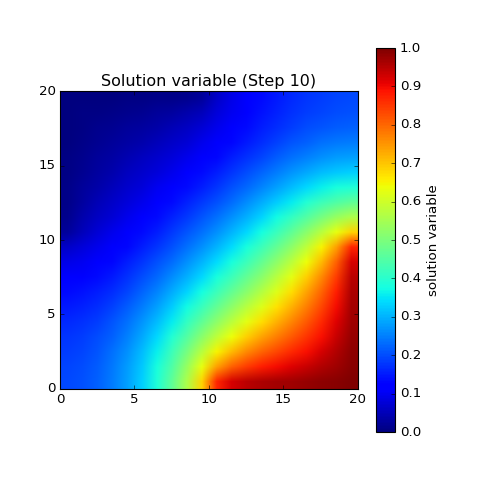

In [9]:
viewer = Viewer(vars=phi, datamin=0., datamax=1.);

and solve the equation by repeatedly looping in time:

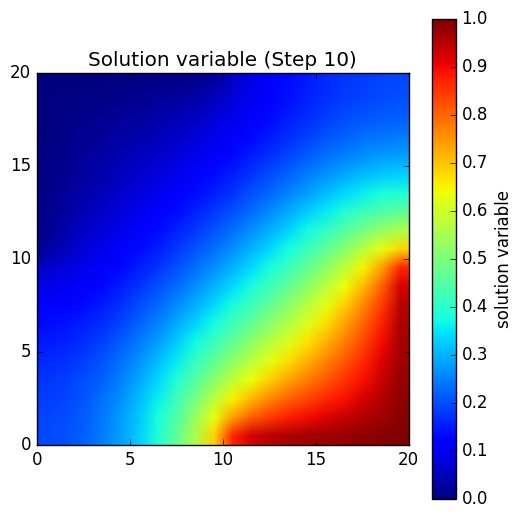

In [10]:
timeStepDuration = 10 * 0.9 * dx**2 / (2 * D)
steps = 10
for step in range(steps):
    eq.solve(var=phi, dt=timeStepDuration)
    viewer.axes.set_title("Solution variable (Step %d)" % (step + 1,))
    # save png files for later processing
    viewer.plot('step%02d.png' % step)
    time.sleep(0.5)
    clear_output()
    display(viewer)

<IPython.core.display.Javascript object>


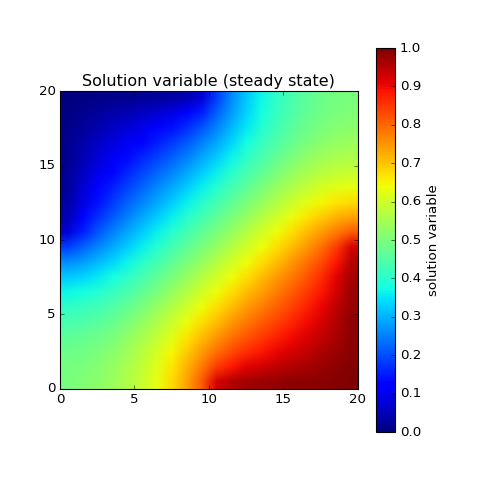

In [11]:
viewer = Viewer(vars=phi, datamin=0., datamax=1.)
DiffusionTerm().solve(var=phi)
viewer.axes.set_title("Solution variable (steady state)")
viewer.plot()

## Postprocessing Saved Images

We saved off a bunch of 

In [12]:
from IPython.display import display, Image
from JSAnimation import IPython_display


In [13]:
import moviepy.editor as mpy
from IPython.display import display, Image
images = ['step%02d.png' % i for i in range(steps)]
clip = mpy.ImageSequenceClip(images, fps=24)
clip.write_gif("mesh.gif",fps=5, opt="OptimizePlus")
clip.write_videofile("mesh.mp4", fps=5) 


[MoviePy] Building file mesh.gif with imageio


100%|██████████| 3/3 [00:00<00:00, 23.17it/s]


[MoviePy] >>>> Building video mesh.mp4
[MoviePy] Writing video mesh.mp4


100%|██████████| 3/3 [00:00<00:00, 20.16it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: mesh.mp4 



In [14]:
Image(url='mesh.gif')

<video controls src="mesh.mp4"/>


We can also solve the steady-state problem directly

<IPython.core.display.Javascript object>


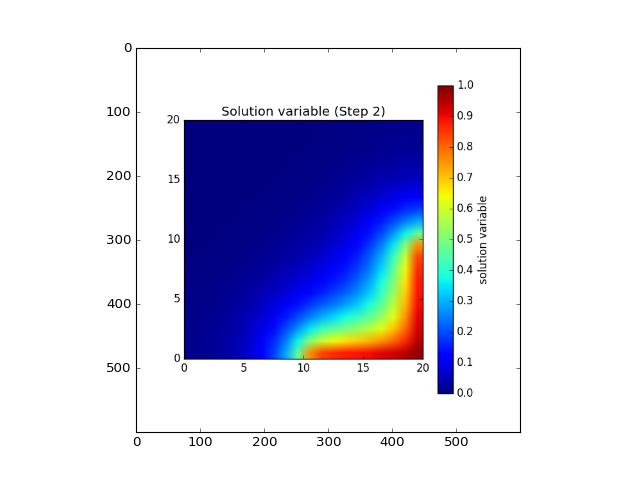

In [15]:
import matplotlib.pyplot as plt 
import matplotlib.image as mgimg
from matplotlib import animation

fig = plt.figure()

# initiate an empty  list of "plotted" images 
myimages = []

#loops through available pngs
for p in range(steps):

    ## Read in picture
    fname = "step%02d.png" % p 
    img = mgimg.imread(fname)
    imgplot = plt.imshow(img)

    # append AxesImage object to the list
    myimages.append([imgplot])

## create an instance of animation
my_anim = animation.ArtistAnimation(fig, myimages, interval=1000, blit=True, repeat_delay=1000)

## NB: The 'save' method here belongs to the object you created above
#my_anim.save("animation.mp4")

## Showtime!
plt.show()


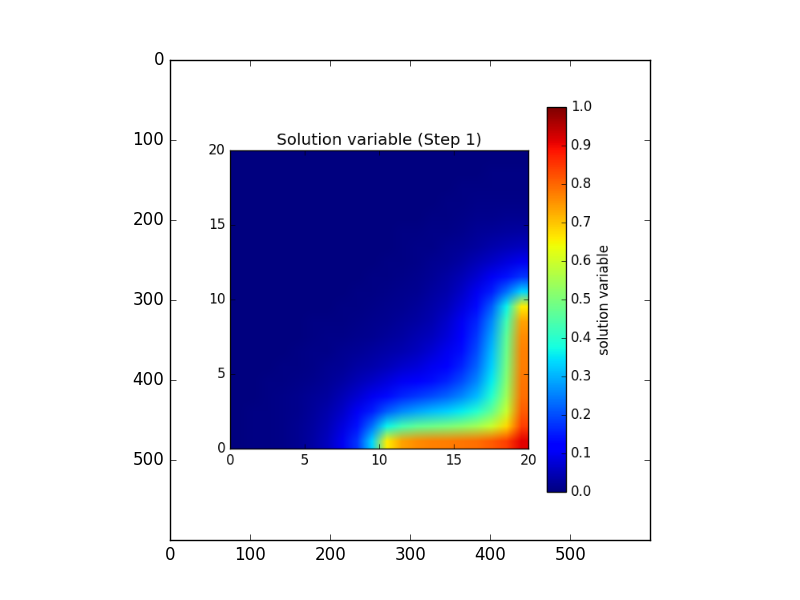
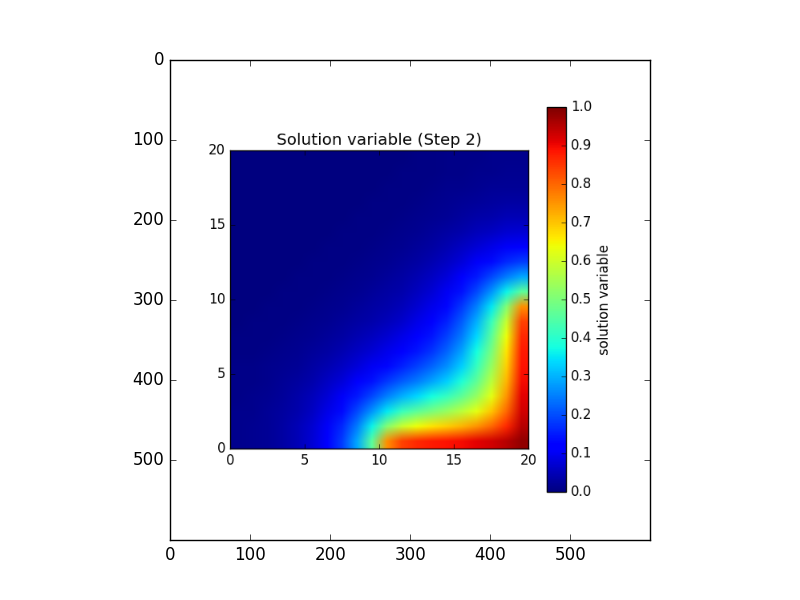
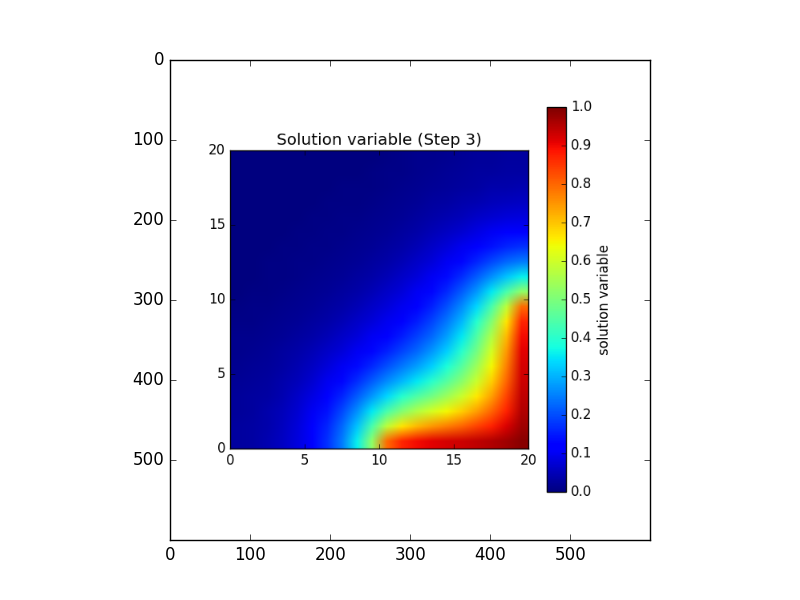
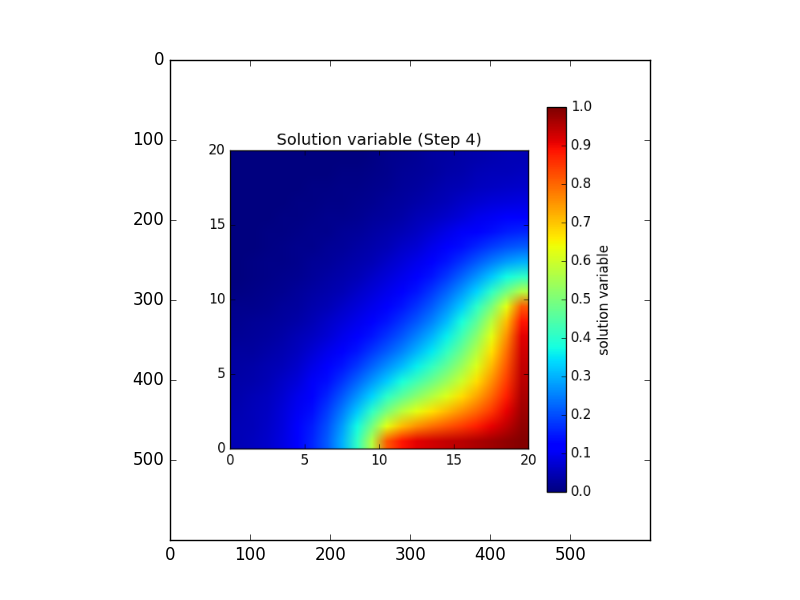
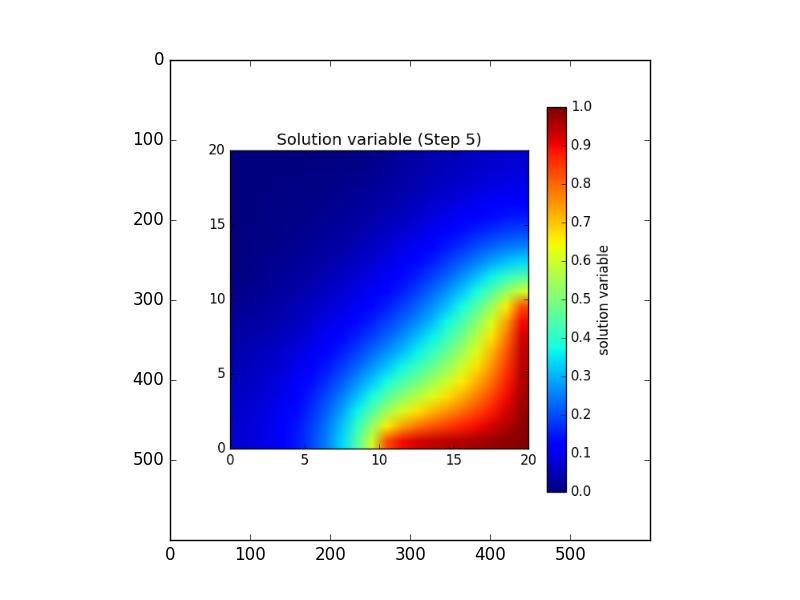
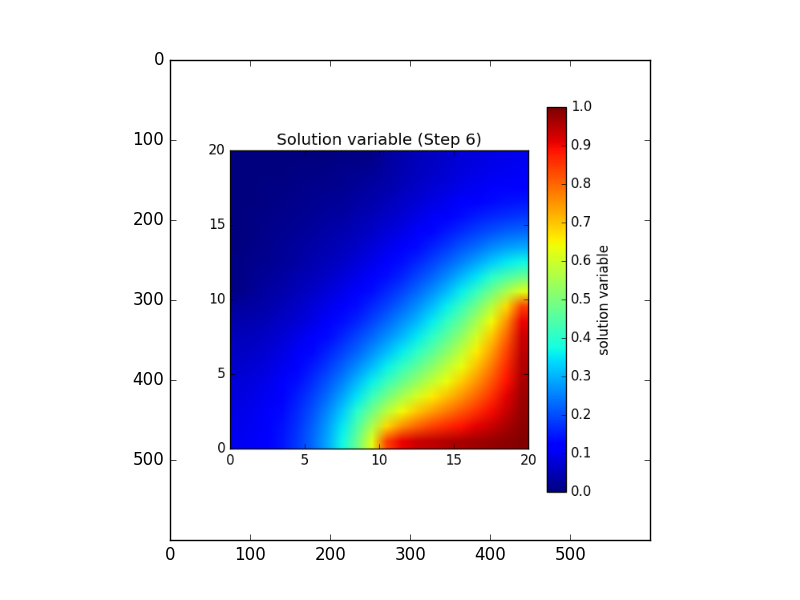
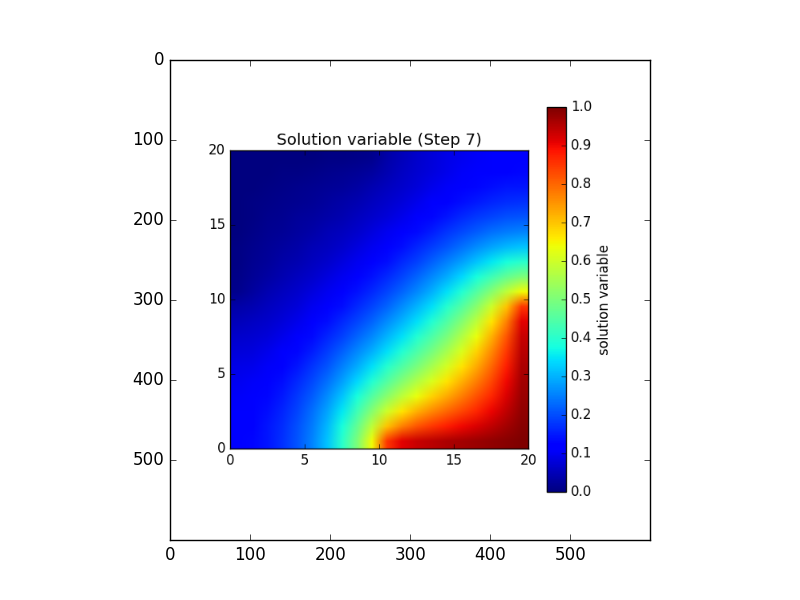
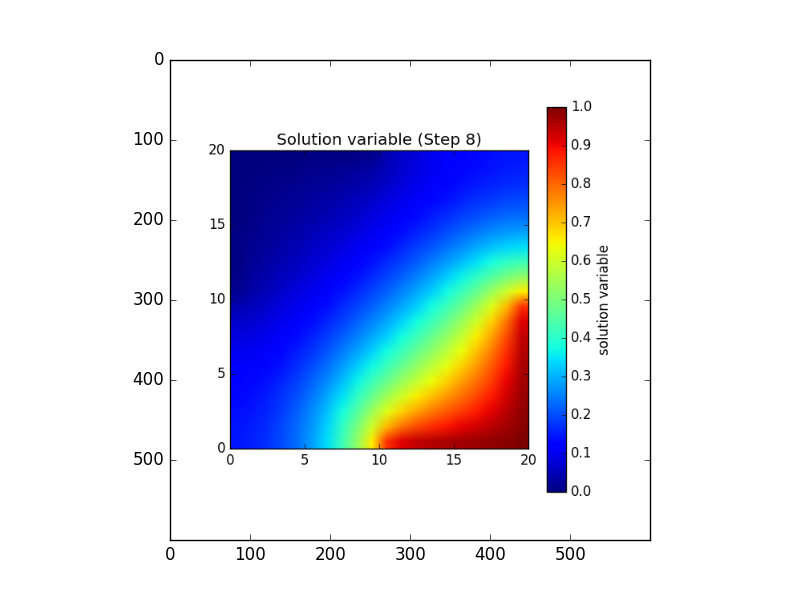
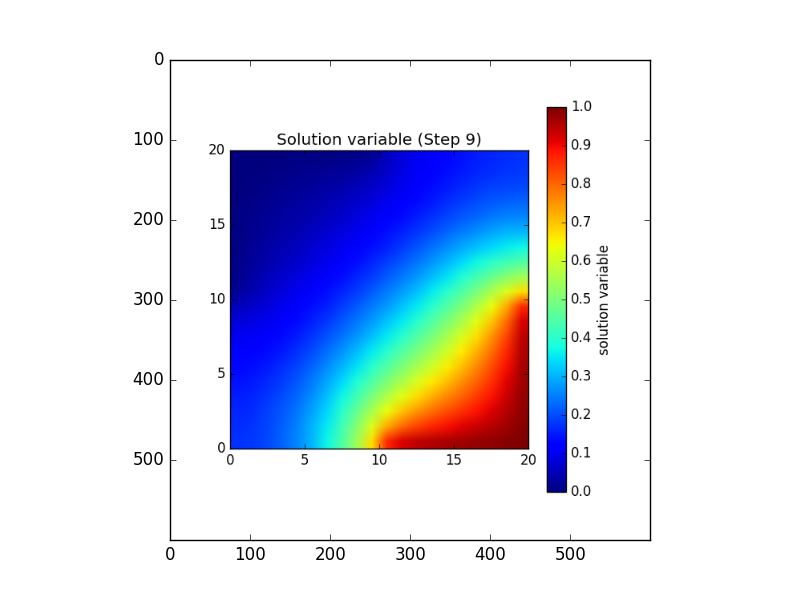
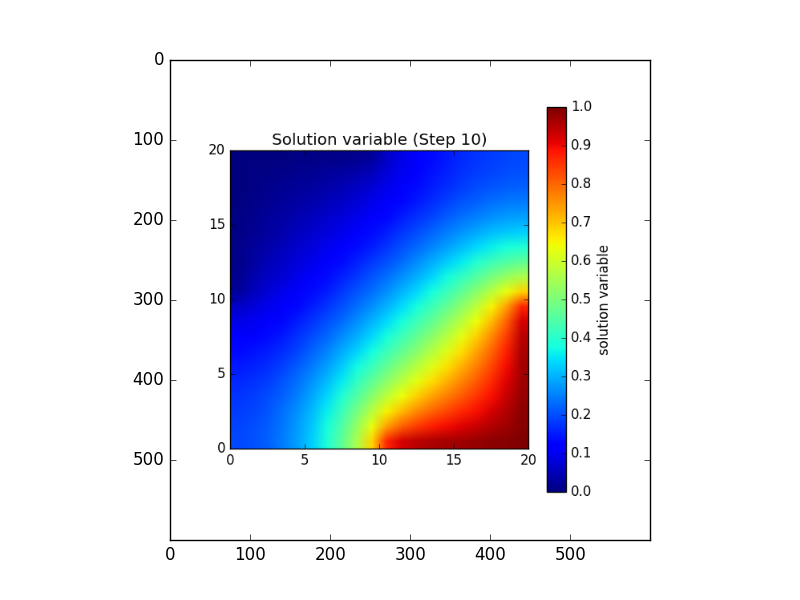

In [16]:
my_anim